In [2]:
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [1]:
# https://drive.google.com/file/d/1ARmyglZNS-omV0pEJtseUVS8-AgkkzxD/view?usp=sharing

!gdown 1ARmyglZNS-omV0pEJtseUVS8-AgkkzxD

Downloading...
From: https://drive.google.com/uc?id=1ARmyglZNS-omV0pEJtseUVS8-AgkkzxD
To: /content/MJMusicDataset.csv
100% 815k/815k [00:00<00:00, 116MB/s]


In [3]:
data = pd.read_csv('MJMusicDataset.csv')

In [4]:
#looking at the first 5 values of the dataset
data.head()

,name,dastgah,instrument,zero_corssing,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,spectral_rolloff_var,chroma_1_mean,chroma_2_mean,...,mfcc_11_var,mfcc_12_var,mfcc_13_var,mfcc_14_var,mfcc_15_var,mfcc_16_var,mfcc_17_var,mfcc_18_var,mfcc_19_var,mfcc_20_var
0,ney-mahoor-ebrahimi .mp3,D_2,I_4,65545,1938.040517,303472.4474,2815.166310,1.754412e+06,0.515210,0.158007,...,482.619965,274.530334,257.260315,200.793167,177.008484,89.304535,49.159683,83.412254,154.657501,417.060425
1,Mohammad_Shojaei_nei_Mahoor.mp3,D_2,I_4,59788,1956.981873,774951.2677,2971.032035,2.082504e+06,0.209722,0.335278,...,435.338196,289.941559,337.219269,266.507416,256.131317,153.390289,90.073257,120.354729,206.031006,267.015015
2,Arash_Samimi_nei_Mahoor.mp3,D_2,I_4,85072,2735.525193,575671.7929,4268.615855,2.663909e+06,0.105867,0.108526,...,299.526794,226.705948,163.451355,140.664673,104.658630,72.048088,53.397228,83.085548,190.668487,331.626526
3,19 sarebaang mahoor.mp3,D_2,I_4,89980,2629.389833,406198.9319,4071.233715,1.005496e+06,0.153988,0.098157,...,305.978638,154.510696,281.793976,348.872650,156.062454,85.470512,45.904568,120.363800,370.077820,306.180878
4,Amjadian.mp3,D_2,I_4,58134,1659.262559,332341.1003,2789.041468,8.496746e+05,0.077795,0.036009,...,81.764854,106.146141,103.081779,85.252548,90.831291,150.201111,332.417633,299.858795,177.197845,186.112488


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 72 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    926 non-null    object 
 1   dastgah                 926 non-null    object 
 2   instrument              926 non-null    object 
 3   zero_corssing           926 non-null    int64  
 4   spectral_centroid_mean  926 non-null    float64
 5   spectral_centroid_var   926 non-null    float64
 6   spectral_rolloff_mean   926 non-null    float64
 7   spectral_rolloff_var    926 non-null    float64
 8   chroma_1_mean           926 non-null    float64
 9   chroma_2_mean           926 non-null    float64
 10  chroma_3_mean           926 non-null    float64
 11  chroma_4_mean           926 non-null    float64
 12  chroma_5_mean           926 non-null    float64
 13  chroma_6_mean           926 non-null    float64
 14  chroma_7_mean           926 non-null    fl

In [7]:
null_counts = data.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

# # Remove rows with null values
data = data.dropna()
# Reset the index after removing rows
data = data.reset_index(drop=True)

Number of null values in each column:
name                      0
dastgah                   0
instrument                0
zero_corssing             0
spectral_centroid_mean    0
                         ..
mfcc_16_var               0
mfcc_17_var               0
mfcc_18_var               0
mfcc_19_var               0
mfcc_20_var               0
Length: 72, dtype: int64


In [93]:
X = data.iloc[:, 3:]
y = data[['dastgah']]
data.shape
print(X.shape)
print(y.shape)

(926, 69)
(926, 1)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True, test_size = 0.20, random_state = 26)


array([[<Axes: title={'center': 'zero_corssing'}>,
        <Axes: title={'center': 'spectral_centroid_mean'}>,
        <Axes: title={'center': 'spectral_centroid_var'}>,
        <Axes: title={'center': 'spectral_rolloff_mean'}>,
        <Axes: title={'center': 'spectral_rolloff_var'}>,
        <Axes: title={'center': 'chroma_1_mean'}>,
        <Axes: title={'center': 'chroma_2_mean'}>,
        <Axes: title={'center': 'chroma_3_mean'}>],
       [<Axes: title={'center': 'chroma_4_mean'}>,
        <Axes: title={'center': 'chroma_5_mean'}>,
        <Axes: title={'center': 'chroma_6_mean'}>,
        <Axes: title={'center': 'chroma_7_mean'}>,
        <Axes: title={'center': 'chroma_8_mean'}>,
        <Axes: title={'center': 'chroma_9_mean'}>,
        <Axes: title={'center': 'chroma_10_mean'}>,
        <Axes: title={'center': 'chroma_11_mean'}>],
       [<Axes: title={'center': 'chroma_12_mean'}>,
        <Axes: title={'center': 'chroma_1_var'}>,
        <Axes: title={'center': 'chroma_2_var'

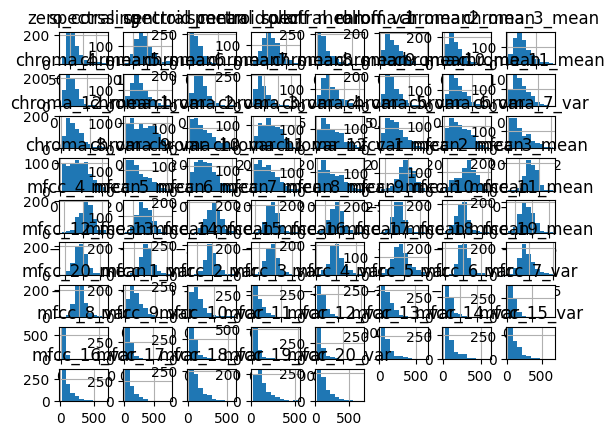

In [16]:
X_train.hist()

array([[<Axes: title={'center': 'zero_corssing'}>,
        <Axes: title={'center': 'spectral_centroid_mean'}>,
        <Axes: title={'center': 'spectral_centroid_var'}>,
        <Axes: title={'center': 'spectral_rolloff_mean'}>,
        <Axes: title={'center': 'spectral_rolloff_var'}>,
        <Axes: title={'center': 'chroma_1_mean'}>,
        <Axes: title={'center': 'chroma_2_mean'}>,
        <Axes: title={'center': 'chroma_3_mean'}>],
       [<Axes: title={'center': 'chroma_4_mean'}>,
        <Axes: title={'center': 'chroma_5_mean'}>,
        <Axes: title={'center': 'chroma_6_mean'}>,
        <Axes: title={'center': 'chroma_7_mean'}>,
        <Axes: title={'center': 'chroma_8_mean'}>,
        <Axes: title={'center': 'chroma_9_mean'}>,
        <Axes: title={'center': 'chroma_10_mean'}>,
        <Axes: title={'center': 'chroma_11_mean'}>],
       [<Axes: title={'center': 'chroma_12_mean'}>,
        <Axes: title={'center': 'chroma_1_var'}>,
        <Axes: title={'center': 'chroma_2_var'

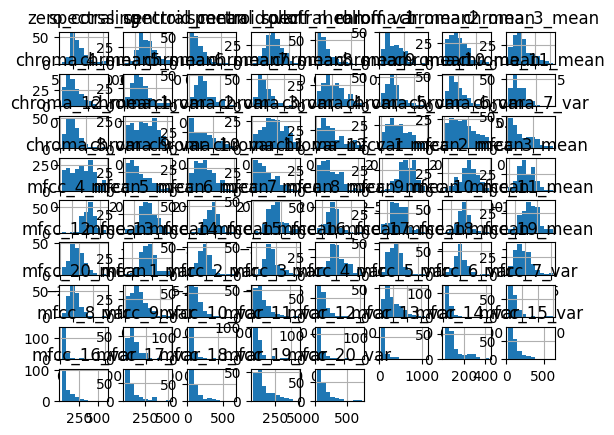

In [18]:
X_test.hist()

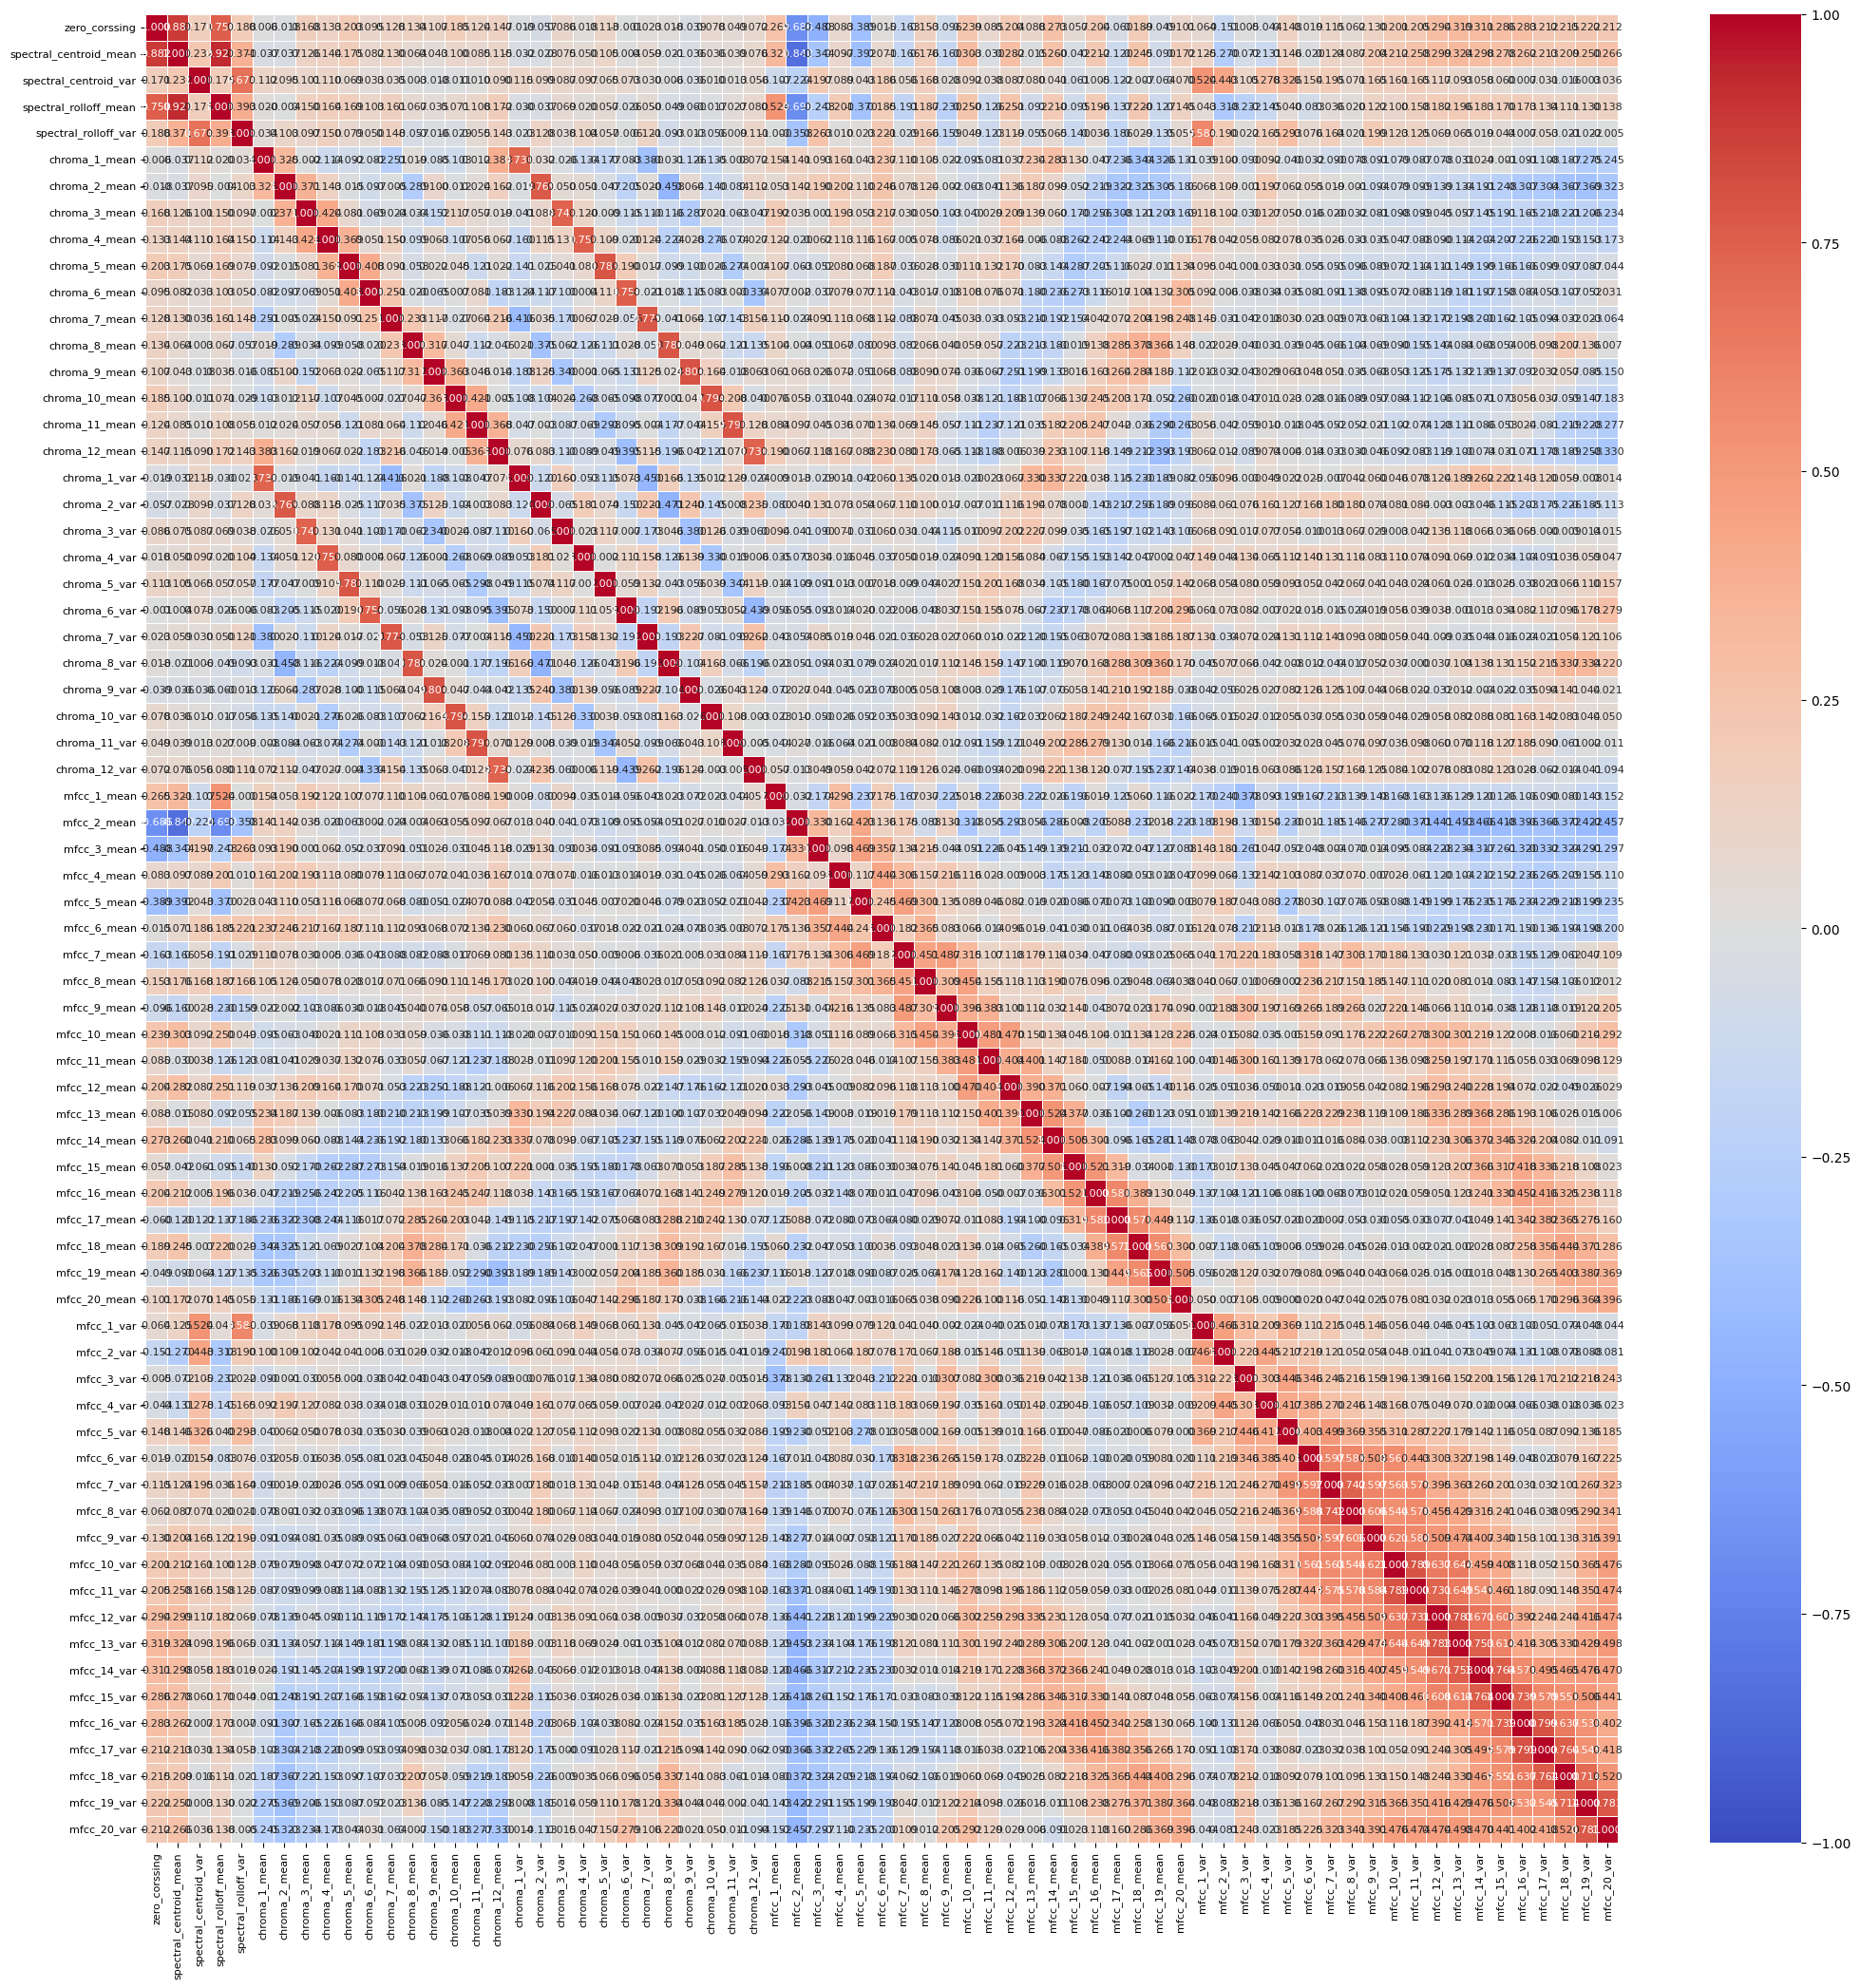

In [20]:
# # Calculating correlation matrix
plt.figure(figsize=(25,25))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt='.3f',
yticklabels=corr_matrix.columns, vmin=-1, vmax=1) #
# Plot correlation results
# Adjust font size of annotations
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

**Normalized data**

In [94]:


def min_max_scaler(data):

  min_values = np.min(data, axis=0)
  max_values = np.max(data, axis=0)
  return (data - min_values) / (max_values - min_values)
X = min_max_scaler(X)

print(X)

     zero_corssing  spectral_centroid_mean  spectral_centroid_var  \
0         0.306089                0.466768               0.194919   
1         0.274196                0.472546               0.506638   
2         0.414264                0.710021               0.374884   
3         0.441453                0.677647               0.262837   
4         0.265034                0.381734               0.214006   
..             ...                     ...                    ...   
921       0.268241                0.474370               0.174059   
922       0.368882                0.562084               0.152375   
923       0.226216                0.416505               0.133416   
924       0.311274                0.347893               0.337982   
925       0.473356                0.531154               0.089840   

     spectral_rolloff_mean  spectral_rolloff_var  chroma_1_mean  \
0                 0.385947              0.266173       0.525781   
1                 0.411168           

In [101]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
X_h = pca.fit_transform(X)


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_h, y,shuffle=True, test_size = 0.20, random_state = 89)


 SVM

In [105]:
model_Lin = SVC(C=3.0,kernel='rbf',tol=0.00001, max_iter=2000)
model_Lin.fit(X_train, y_train)
accuracy_svm = model_Lin.score(X_test ,y_test )
print("test_accuracy:", accuracy_svm)

test_accuracy: 0.41397849462365593


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


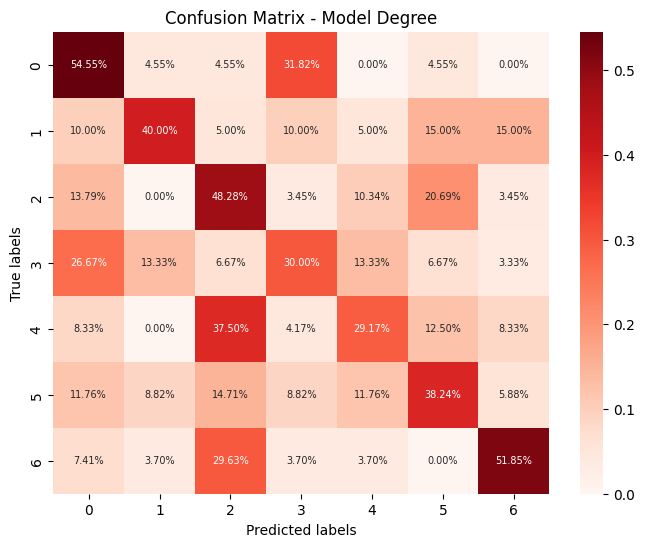

In [111]:
# Calculating of ten Confusion matrix
from sklearn.metrics import confusion_matrix
# List of model degrees
y_pred1 = model_Lin.predict(X_test)
    # Making the Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred1)

    # Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix / cf_matrix.sum(axis=1)[:, np.newaxis], annot=True, fmt='.2%', cmap='Reds', annot_kws={"size":7})
# sns.heatmap(cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt='.2%', cmap='Blues')
    # Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix - Model Degree' )
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()